# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("2330.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5839 entries, 2000-01-04 00:00:00+08:00 to 2023-06-01 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5839 non-null   float64
 1   High                       5839 non-null   float64
 2   Low                        5839 non-null   float64
 3   Close                      5839 non-null   float64
 4   Volume                     5839 non-null   int64  
 5   Dividends                  5839 non-null   float64
 6   Stock Splits               5839 non-null   float64
 7   volume_adi                 5839 non-null   float64
 8   volume_obv                 5839 non-null   int64  
 9   volume_cmf                 5820 non-null   float64
 10  volume_fi                  5826 non-null   float64
 11  volume_em                  5731 non-null   float64
 12  volume_sma_em              4914 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                                 Open        High         Low       Close   
Date                                                                        
2000-01-04 00:00:00+08:00   35.203026   35.203026   34.609721   35.203026  \
2000-01-05 00:00:00+08:00   35.203039   35.994049   34.807439   35.994049   
2000-01-06 00:00:00+08:00   35.796331   35.994036   35.203026   35.203026   
2000-01-07 00:00:00+08:00   34.016421   34.609726   33.620822   34.214127   
2000-01-10 00:00:00+08:00   35.203032   35.598443   34.609727   35.400738   
...                               ...         ...         ...         ...   
2023-05-26 00:00:00+08:00  568.000000  568.000000  563.000000  566.000000   
2023-05-29 00:00:00+08:00  574.000000  574.000000  564.000000  568.000000   
2023-05-30 00:00:00+08:00  566.000000  568.000000  563.000000  566.000000   
2023-05-31 00:00:00+08:00  560.000000  562.000000  551.000000  558.000000   
2023-06-01 00:00:00+08:00  550.000000  554.000000  550.000000  551.000000   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5839 entries, 2000-01-04 00:00:00+08:00 to 2023-06-01 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5839 non-null   float64
 1   High             5839 non-null   float64
 2   Low              5839 non-null   float64
 3   Close            5839 non-null   float64
 4   Volume           5839 non-null   int64  
 5   trend_macd_diff  5806 non-null   float64
 6   trend_ema_fast   5828 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 364.9 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date        Open        High   
Date                                                                          
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  602.366705  615.017379  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  627.668081  638.372498   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  651.023075  651.023075   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  620.856113  628.641143   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  625.721782  628.641168   
...                                             ...         ...         ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  511.234039  516.207133   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  512.228648  514.217885   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  503.277110  506.260966   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  509.244812  518.196381   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00 

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,470.728941,485.562836,470.728941,485.562836,37343127,10.585090,453.042191,97.402582,71.024086
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,489.024104,490.507494,483.090546,486.551788,33475337,9.432683,458.197513,96.595744,71.250506
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,488.529654,490.507507,486.551802,490.507507,27396552,8.362749,463.168282,100.000000,72.186696
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,488.529646,492.485352,488.529646,492.485352,39949969,7.255312,467.678600,100.000000,72.665976
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,480.618203,484.573908,475.179108,475.179108,38926919,4.935220,468.832524,81.481451,62.514835
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,468.256641,482.596074,467.762178,481.607147,38182197,3.480100,470.797851,88.043462,64.498598
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,477.651459,484.573944,477.156996,484.573944,57111603,2.414588,472.917250,87.301597,65.408498
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,500.396776,502.374629,492.979828,492.979828,41746878,1.990737,476.003800,85.714292,67.917476
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,484.573918,491.496403,484.573918,487.046234,28319679,1.071637,477.702636,66.304290,64.368369


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 20, 'C': 10.0, 'epsilon': 0.1}
最佳相对误差: 0.0 %


SVR(C=10.0)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[482.26051454 490.12896805 480.19582472 485.47679225 492.6287509
 476.52078695 477.96486325 479.01577364 457.83172448 474.00253532
 491.66891597 491.62534593 475.66051365 481.28531108 492.78775687
 494.05655874 497.71845333 485.74201709 489.04485022 495.50839742
 466.35771804 497.66079236 488.4387959  481.81417615 499.82554186
 494.92772477 499.25853204 499.58136713 486.63940553 496.41563552
 497.30178208 499.75398431 498.59916205 496.02906041 497.76709004
 467.49139374 486.55347097 497.67465127 497.72385337 459.34022278
 484.28351386 492.24637171 477.96508438 457.12290714 485.16638309
 472.17151942 487.82830793 488.7647998  496.07976621 483.30698684
 498.73444483 491.4800991  496.59253486 497.17777034 456.00048888
 489.82345372 491.87882428 498.19638477 499.84651553 495.22199159
 494.53968919 474.07813735]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
5776 2023-03-01 00:00:00+08:00       482.260515
5777 2023-03-02 00:00:00+08:00       490.128968
5778 2023-03-03 00:00:00+08:00       480.195825
5779 2023-03-06 00:00:00+08:00       485.476792
5780 2023-03-07 00:00:00+08:00       492.628751
...                        ...              ...
5833 2023-05-25 00:00:00+08:00       498.196385
5834 2023-05-26 00:00:00+08:00       499.846516
5835 2023-05-29 00:00:00+08:00       495.221992
5836 2023-05-30 00:00:00+08:00       494.539689
5837 2023-05-31 00:00:00+08:00       474.078137

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-05-22 00:00:00+08:00
最低值： 456.0004888790479
最高值日期： 2023-05-26 00:00:00+08:00
最高值： 499.8465155291537


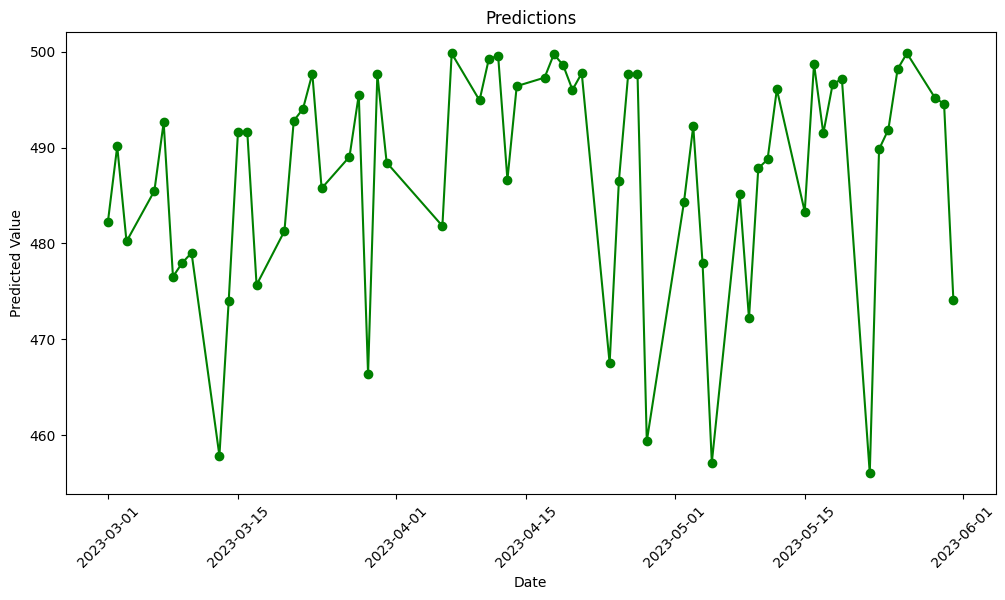

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

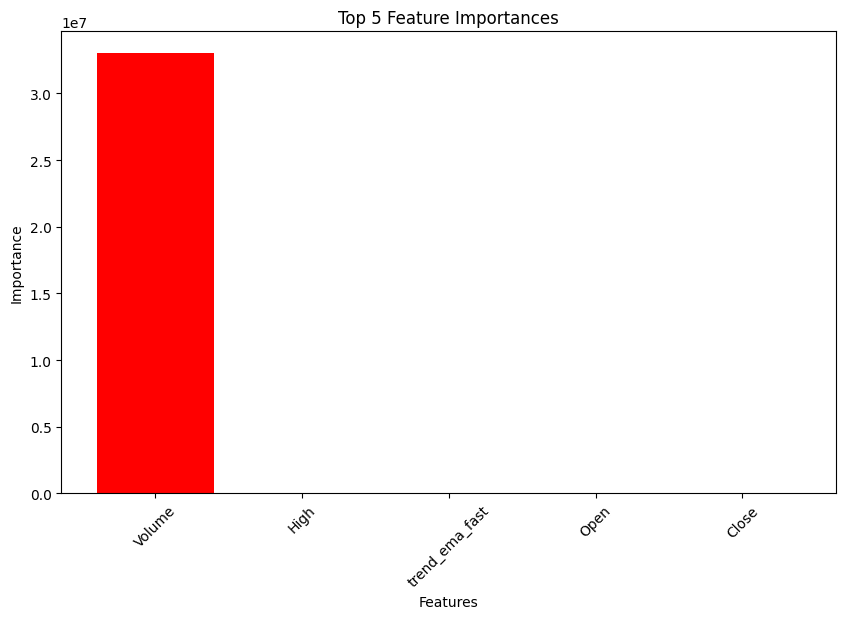

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 95, 'n_estimators': 100, 'max_depth': 4, 'min_samples_leaf': 1}
最佳相对误差: 0.3941210824157575 %


RandomForestRegressor(max_depth=4, random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[481.56397019 478.2167766  486.31523159 487.37135445 490.00684542
 492.30018312 477.22690817 481.3646751  483.8656083  492.40204339
 487.37135445 483.05982673 471.3582834  469.27436953 467.11920502
 478.2167766  468.79732696 467.260702   476.984858   478.5756621
 467.44733043 466.2095197  455.7267427  456.10111383 467.05171889
 454.21126962 454.06516254 455.54995957 447.77674193 443.17168565
 446.38031406 449.06759161 446.54524919 455.59232838 455.30561059
 478.30874536 482.64230886 481.56397019 483.05947145 497.86680378
 501.49071668 500.16233442 538.19978012 519.63844908 524.82142691
 537.92879411 538.06736861 523.65930916 519.6668974  537.7928208
 537.92879411 539.00142594 537.92879411 539.41889293 523.11643663
 524.04543873 514.43050332 513.82503153 513.37282787 502.54572864
 514.32859687 510.17467845]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
5776 2023-03-01 00:00:00+08:00      481.563970
5777 2023-03-02 00:00:00+08:00      478.216777
5778 2023-03-03 00:00:00+08:00      486.315232
5779 2023-03-06 00:00:00+08:00      487.371354
5780 2023-03-07 00:00:00+08:00      490.006845
...                        ...             ...
5833 2023-05-25 00:00:00+08:00      513.825032
5834 2023-05-26 00:00:00+08:00      513.372828
5835 2023-05-29 00:00:00+08:00      502.545729
5836 2023-05-30 00:00:00+08:00      514.328597
5837 2023-05-31 00:00:00+08:00      510.174678

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-04-14 00:00:00+08:00
最低值： 443.1716856510252
最高值日期： 2023-05-19 00:00:00+08:00
最高值： 539.4188929274965


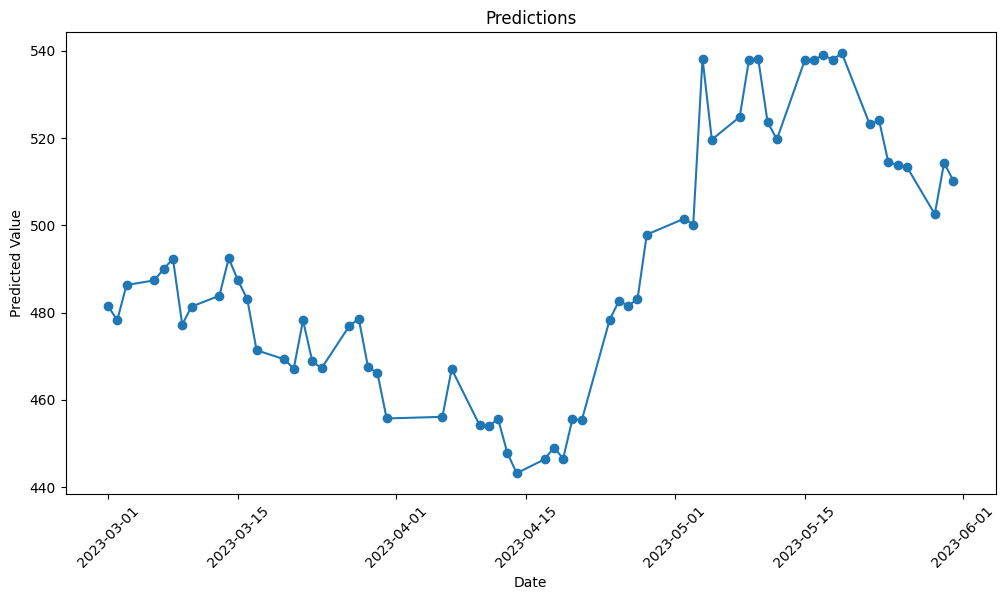

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



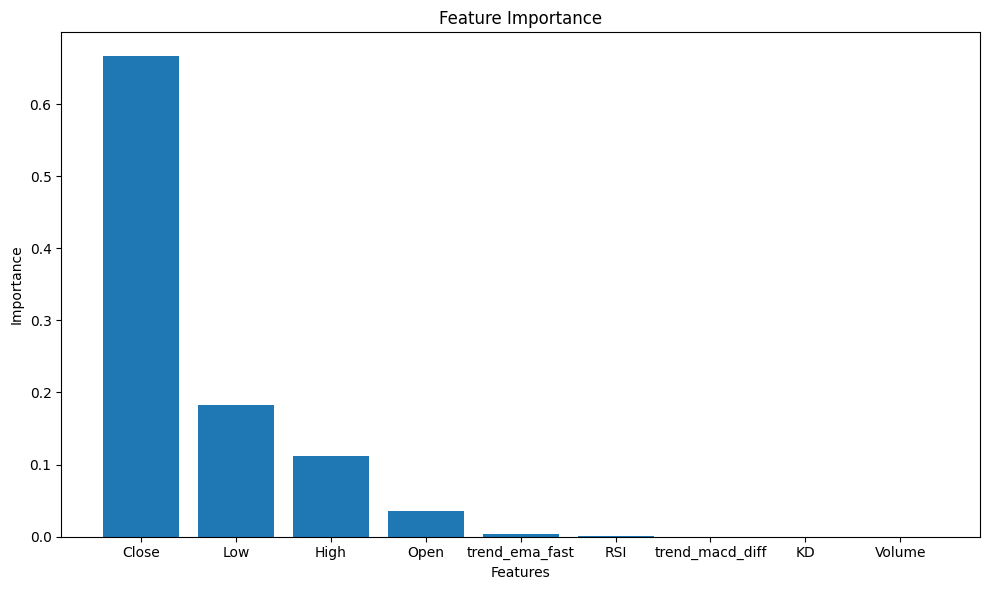

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[308.27945 305.2276  310.1329  310.98502 313.33945 314.58267 304.0595
 308.27945 309.61847 314.58267 310.98502 309.1698  301.9268  299.57477
 297.8197  304.64954 299.57477 297.8197  304.0595  305.71066 298.44052
 296.18274 289.1069  289.76398 297.4035  287.7794  288.62253 288.62253
 285.22818 282.05548 283.6958  285.97748 284.29797 289.76398 289.76398
 305.71066 309.1698  308.27945 309.1698  317.17786 320.5922  319.25693
 322.82455 322.82455 322.82455 322.82455 322.82455 322.82455 322.82455
 322.82455 322.82455 322.82455 322.82455 322.82455 322.82455 322.82455
 322.82455 322.82455 322.82455 321.87872 322.82455 322.82455]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
5776 2023-03-01 00:00:00+08:00      308.279449
5777 2023-03-02 00:00:00+08:00      305.227600
5778 2023-03-03 00:00:00+08:00      310.132904
5779 2023-03-06 00:00:00+08:00      310.985016
5780 2023-03-07 00:00:00+08:00      313.339447
...                        ...             ...
5833 2023-05-25 00:00:00+08:00      322.824554
5834 2023-05-26 00:00:00+08:00      322.824554
5835 2023-05-29 00:00:00+08:00      321.878723
5836 2023-05-30 00:00:00+08:00      322.824554
5837 2023-05-31 00:00:00+08:00      322.824554

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-04-14 00:00:00+08:00
最低值： 282.05548
最高值日期： 2023-05-04 00:00:00+08:00
最高值： 322.82455


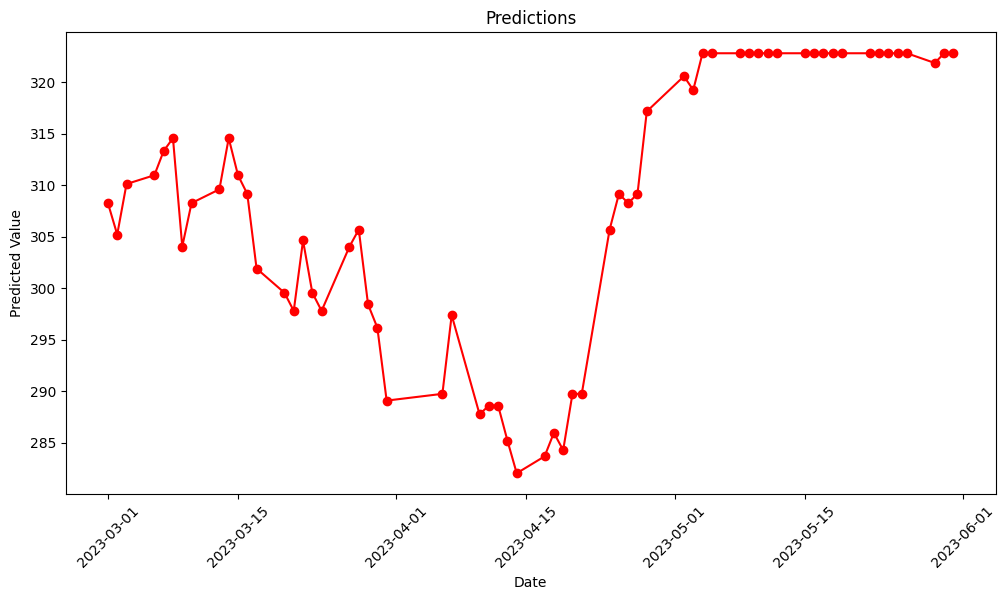

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



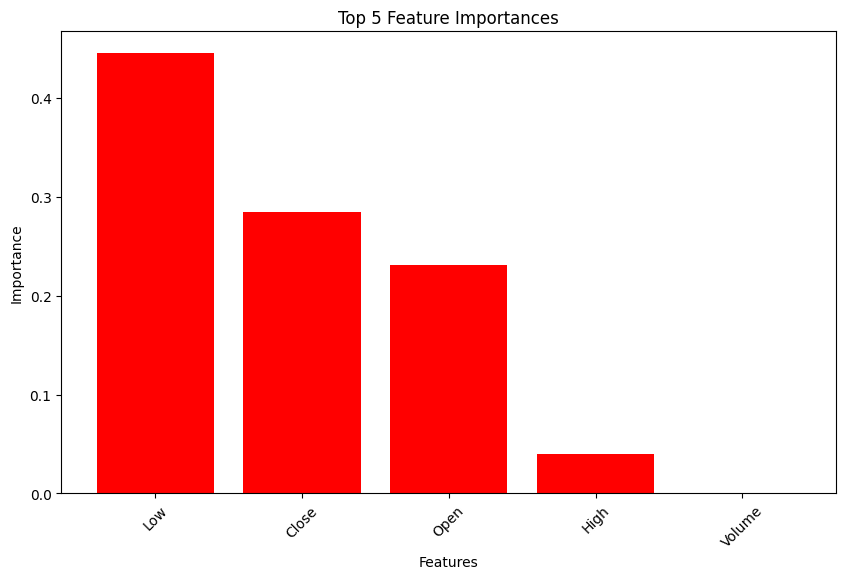

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


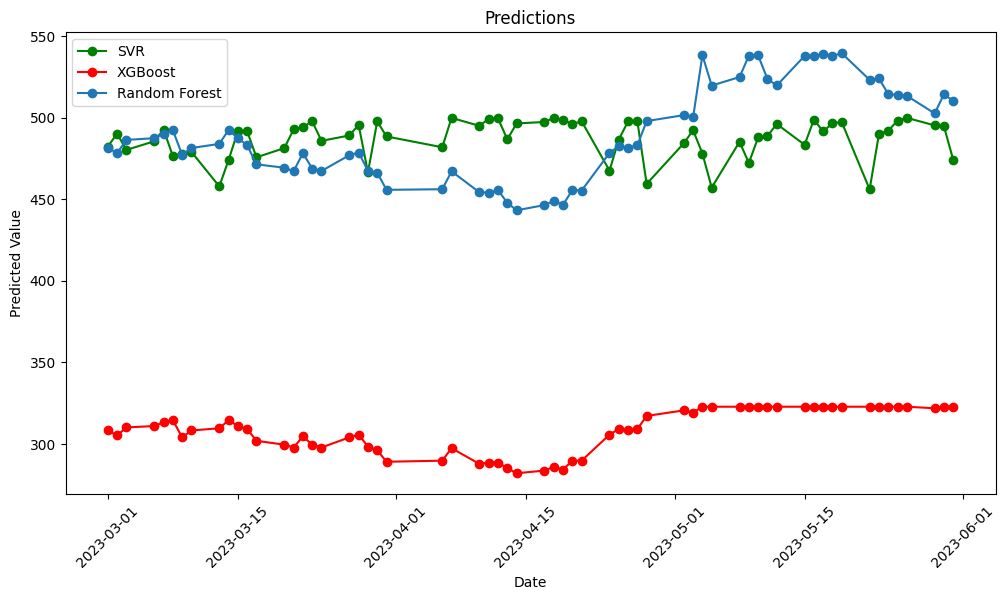

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
